# Qodirjon Narzullayev 230232
### Data Inspection & Cleaning


The Titanic dataset was loaded using Seaborn's built-in function into a Pandas DataFrame, and
the first few rows were displayed with df.head() to provide an initial overview of the data. The
DataFrame’s structure was examined using df.info(), which revealed the data types and
non-null counts, while summary statistics were generated with df.describe() to understand
the central tendencies and spread of the numerical columns. Missing values were identified with
df.isnull().sum(), and for numerical columns like "age", these missing values were filled
using the median, whereas for categorical columns such as "embarked", the mode was used to
ensure consistency. Additionally, a check for duplicate rows was performed using
df.duplicated().sum(), and any duplicates found were removed to maintain data integrity.
Finally, categorical columns were identified and converted to the 'category' data type, optimizing
memory usage and preparing the data for further analysis. The result is a cleaned and
well-structured dataset, with missing values handled appropriately, duplicates removed, and
categorical variables converted, laying a solid foundation for subsequent analysis and
visualization.

In [7]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataFrame info:")
df.info()
print("\nSummary statistics:")
print(df.describe())
print("\nMissing values in each column:")
print(df.isnull().sum())
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
df = df.drop_duplicates()
print("Duplicates removed.")
else:
print("No duplicate rows found.")
for col in categorical_columns:
df[col] = df[col].astype('category')
print("\nDataFrame info after cleaning and conversion:")
df.info()



FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

### Summary Statistics & Initial Insights

Descriptive statistics were obtained using df.describe(), which calculated the mean,
standard deviation, minimum, and maximum values for the numerical columns.
Additionally, the median for these numerical columns was computed separately using
df.median(numeric_only=True) since it is not included in the default descriptive
statistics. To understand the linear relationships between variables, the .corr()
method was employed to generate a correlation matrix for the numerical features,
providing valuable insight for further analysis. The data was then grouped by the
'survived' column to calculate the average age for survivors versus non-survivors,
offering a perspective on whether age might have influenced survival outcomes. Further
analytical questions were addressed by calculating the overall survival percentage,
determined by dividing the total number of survivors by the overall number of
passengers. The dataset was also grouped by 'sex' to compute the mean of the
'survived' column, thereby determining the survival rate for each gender and converting
the results into percentages. Similarly, survival rates were analyzed based on the 'pclass'
(passenger class) variable, revealing whether there was a notable difference in survival
chances among different classes. Overall, these summary statistics provided a clear
overview of the central tendencies and variability in the dataset, while the correlation
matrix and grouped analyses helped uncover specific trends, such as variations in
survival percentages between genders and across passenger classes, setting the stage
for more advanced predictive modeling or further exploration.

In [2]:
print("Summary statistics for numerical columns:")
print(df.describe())
print("\nMedian values for numerical columns:")
print(df.median(numeric_only=True))
print("\nCorrelation matrix:")
print(df.corr())
avg_age_survival = df.groupby('survived')['age'].mean()
print("\nAverage age of survivors vs. non-survivors:")
print(avg_age_survival)
total_passengers = df.shape[0]
# Assuming 'survived' is binary (0: did not survive, 1: survived)
survived_count = df['survived'].sum()
survival_percentage = (survived_count / total_passengers) * 100
print(f"\nPercentage of passengers who survived: {survival_percentage:.2f}%")
survival_by_gender = df.groupby('sex')['survived'].mean() * 100  # Convert to percentage
print("\nSurvival rate by gender (in percentage):")
print(survival_by_gender)
survival_by_class = df.groupby('pclass')['survived'].mean() * 100  # Convert to percentage
print("\nSurvival rate by passenger class (in percentage):")
print(survival_by_class)

Summary statistics for numerical columns:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Median values for numerical columns:
survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

Correlation matrix:


ValueError: could not convert string to float: 'male'

### Data Visualization

A histogram was generated using Seaborn's histplot function, enhanced with a kernel
density estimate (KDE) to visualize the age distribution of the passengers. This plot reveals the
overall distribution of ages in the dataset, highlighting central tendencies, variability, and any
potential outliers. In addition, a bar chart was created using Seaborn's countplot to compare
the number of survivors and non-survivors across different genders, which clearly demonstrates
differences in survival counts and highlights trends such as one gender potentially having a
higher survival rate than the other. A heatmap was also employed to display the correlation
matrix for numerical variables, with the correlation coefficients annotated to facilitate
interpretation. This heatmap visually presents the strength and direction of linear relationships
between the numerical features, aiding in the identification of significant correlations that may
warrant further analysis. Together, these visualizations offer a multifaceted view of the dataset:
the histogram clarifies the age distribution, the bar chart reveals survival trends by gender, and
the heatmap uncovers interrelationships among numerical features, all of which provide
valuable insights to support further data exploration and modeling efforts.

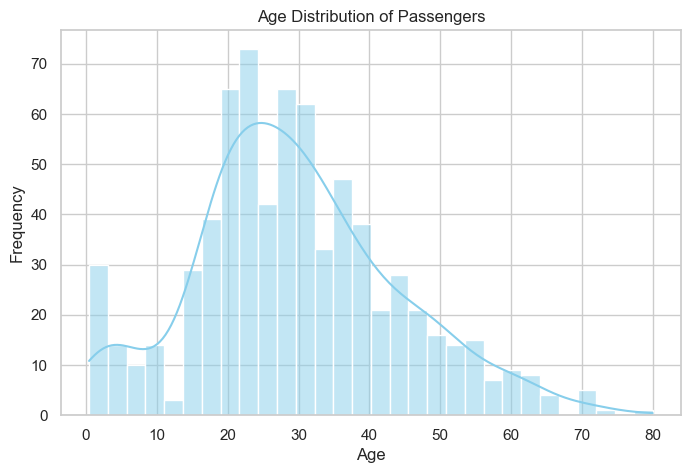

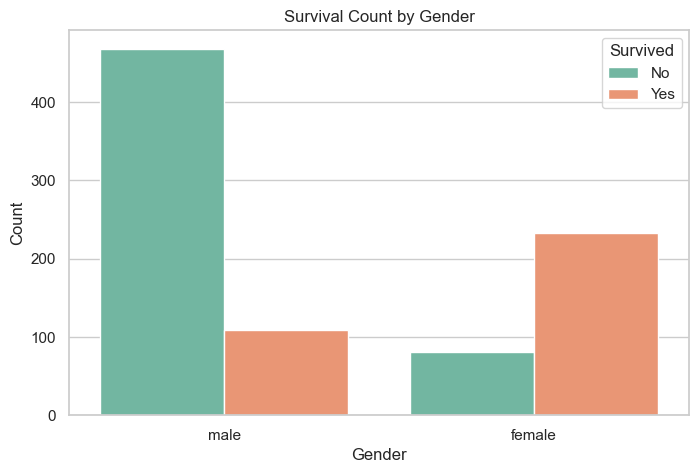

ValueError: could not convert string to float: 'male'

<Figure size 1000x800 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', bins=30, kde=True, color='skyblue')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex', hue='survived', palette="Set2")
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()